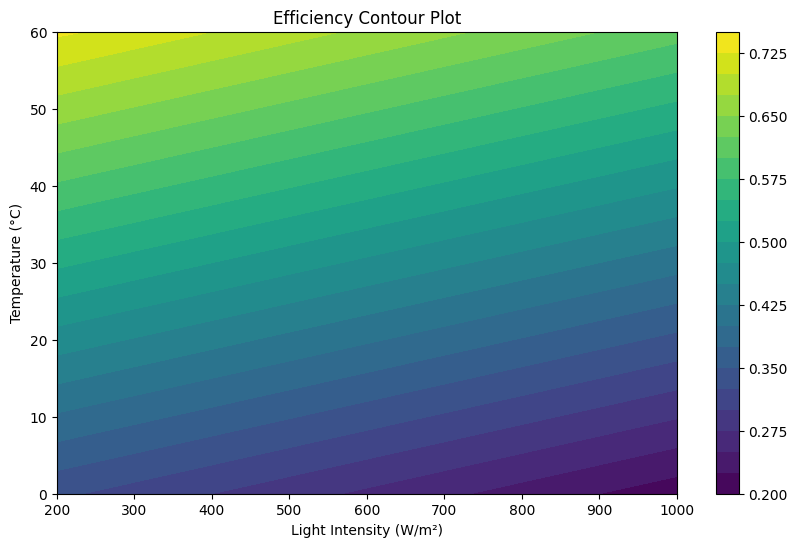

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
BOLTZMANN_CONSTANT = 1.38e-23  # J/K
ELEMENTARY_CHARGE = 1.6e-19     # C

# Solar cell parameters
base_efficiency = 0.18  # Base efficiency of perovskite solar cells
temperature_coefficient = -0.002  # Efficiency decrease per degree Celsius
light_intensity_coefficient = 0.0005  # Efficiency increase per unit of light intensity

def calculate_efficiency(light_intensity, temperature):
    """
    Calculate the efficiency of a perovskite solar cell based on light intensity and temperature.
    
    Parameters:
    - light_intensity: in W/m^2
    - temperature: in degrees Celsius
    
    Returns:
    - efficiency: efficiency of the solar cell
    """
    efficiency = base_efficiency + (light_intensity * light_intensity_coefficient)
    efficiency += temperature_coefficient * (temperature - 25)  # Reference temperature is 25°C
    return max(efficiency, 0)  # Efficiency should not be negative

def simulate(light_intensities, temperatures):
    efficiencies = []
    for light_intensity in light_intensities:
        row = []
        for temperature in temperatures:
            efficiency = calculate_efficiency(light_intensity, temperature)
            row.append(efficiency)
        efficiencies.append(row)
    return np.array(efficiencies)

# Define ranges for light intensity and temperature
light_intensities = np.linspace(200, 1000, 10)  # from 200 W/m^2 to 1000 W/m^2
temperatures = np.linspace(0, 60, 10)            # from 0°C to 60°C

# Run simulation
efficiencies = simulate(light_intensities, temperatures)

# Plotting the results
X, Y = np.meshgrid(light_intensities, temperatures)
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, efficiencies, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.title('Efficiency of Perovskite Solar Cells')
plt.xlabel('Light Intensity (W/m²)')
plt.ylabel('Temperature (°C)')
plt.title('Efficiency Contour Plot')
plt.show()

                     Stage  CO2_Emissions (kg)  Energy Consumption (MJ)  \
0  Raw Material Extraction                  50                      200   
1            Manufacturing                 150                      500   
2                Use Phase                  10                       50   
3              End-of-Life                   5                       10   

   Total CO2 Emissions (kg)  Total Energy Consumption (MJ)  
0                       215                            760  
1                       215                            760  
2                       215                            760  
3                       215                            760  


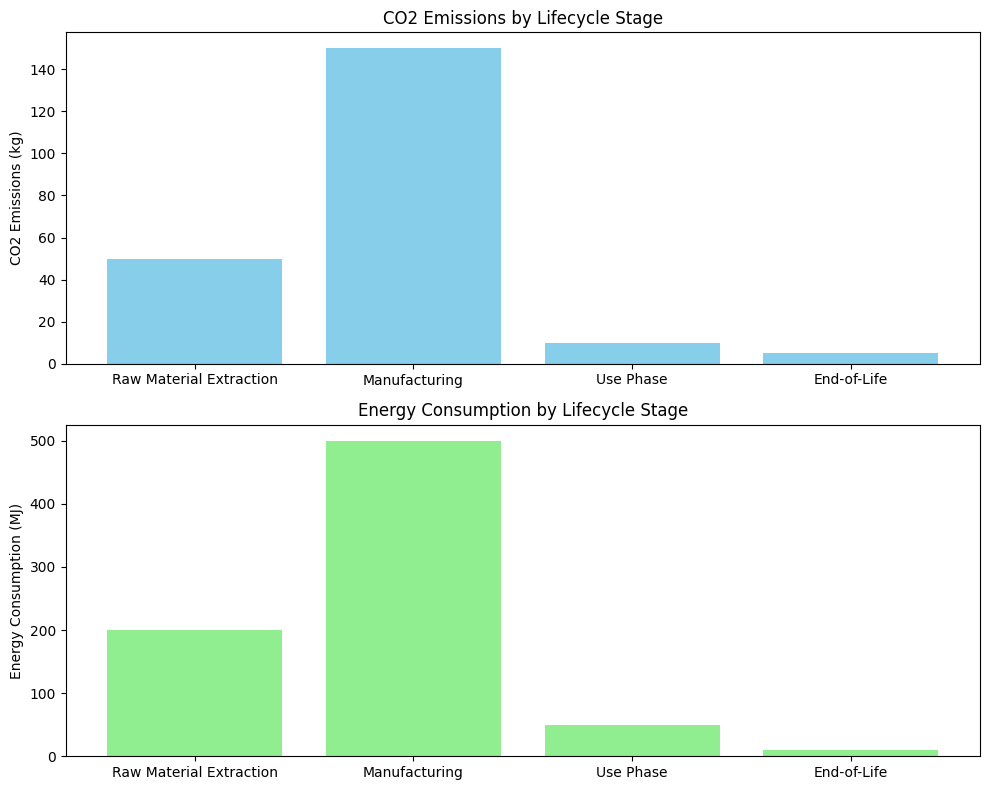

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define hypothetical data for each lifecycle stage
data = {
    'Stage': ['Raw Material Extraction', 'Manufacturing', 'Use Phase', 'End-of-Life'],
    'CO2_Emissions (kg)': [50, 150, 10, 5],  # Example emissions in kg
    'Energy Consumption (MJ)': [200, 500, 50, 10],  # Example energy in MJ
}

# Create a DataFrame
lca_df = pd.DataFrame(data)

# Calculate total impacts
lca_df['Total CO2 Emissions (kg)'] = lca_df['CO2_Emissions (kg)'].sum()
lca_df['Total Energy Consumption (MJ)'] = lca_df['Energy Consumption (MJ)'].sum()

# Print the DataFrame
print(lca_df)

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# CO2 Emissions Bar Chart
ax[0].bar(lca_df['Stage'], lca_df['CO2_Emissions (kg)'], color='skyblue')
ax[0].set_title('CO2 Emissions by Lifecycle Stage')
ax[0].set_ylabel('CO2 Emissions (kg)')

# Energy Consumption Bar Chart
ax[1].bar(lca_df['Stage'], lca_df['Energy Consumption (MJ)'], color='lightgreen')
ax[1].set_title('Energy Consumption by Lifecycle Stage')
ax[1].set_ylabel('Energy Consumption (MJ)')

plt.tight_layout()
plt.show()

Mean Squared Error: 1.6031454369797817
R² Score: 0.9470034566287675


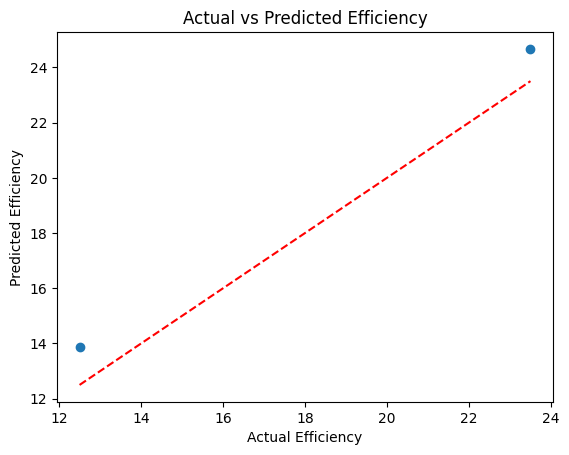

Predicted Efficiency for A: 60%, B: 30%, C: 5% is 20.81%


C:\Users\ASUS TUF DASH F15\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create a hypothetical dataset
data = {
    'Material_A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Material_B': [90, 80, 70, 60, 50, 40, 30, 20, 10, 0],
    'Material_C': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
    'Efficiency': [10.1, 12.5, 15.0, 18.0, 20.5, 21.0, 22.5, 23.0, 23.5, 24.0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Prepare the features and target variable
X = df[['Material_A', 'Material_B', 'Material_C']]
y = df['Efficiency']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Step 7: Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Actual vs Predicted Efficiency')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.show()

# Step 8: Optimize materials
def optimize_materials(material_a, material_b, material_c):
    input_data = np.array([[material_a, material_b, material_c]])
    predicted_efficiency = model.predict(input_data)
    return predicted_efficiency[0]

# Example optimization
optimized_efficiency = optimize_materials(60, 30, 5)  # Example input
print(f'Predicted Efficiency for A: 60%, B: 30%, C: 5% is {optimized_efficiency:.2f}%')